# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][20]	 Batch [0][550]	 Training Loss 0.3367	 Accuracy 0.1500
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.1276	 Accuracy 0.1806
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.1128	 A

Epoch [7][20]	 Batch [450][550]	 Training Loss 0.0652	 Accuracy 0.8451
Epoch [7][20]	 Batch [500][550]	 Training Loss 0.0652	 Accuracy 0.8444

Epoch [7]	 Average training loss 0.0652	 Average training accuracy 0.8449
Epoch [7]	 Average validation loss 0.0622	 Average validation accuracy 0.8834

Epoch [8][20]	 Batch [0][550]	 Training Loss 0.0622	 Accuracy 0.8900
Epoch [8][20]	 Batch [50][550]	 Training Loss 0.0641	 Accuracy 0.8547
Epoch [8][20]	 Batch [100][550]	 Training Loss 0.0643	 Accuracy 0.8536
Epoch [8][20]	 Batch [150][550]	 Training Loss 0.0648	 Accuracy 0.8464
Epoch [8][20]	 Batch [200][550]	 Training Loss 0.0648	 Accuracy 0.8456
Epoch [8][20]	 Batch [250][550]	 Training Loss 0.0648	 Accuracy 0.8459
Epoch [8][20]	 Batch [300][550]	 Training Loss 0.0648	 Accuracy 0.8466
Epoch [8][20]	 Batch [350][550]	 Training Loss 0.0650	 Accuracy 0.8453
Epoch [8][20]	 Batch [400][550]	 Training Loss 0.0650	 Accuracy 0.8463
Epoch [8][20]	 Batch [450][550]	 Training Loss 0.0650	 Accuracy 0.84

Epoch [16][20]	 Batch [300][550]	 Training Loss 0.0645	 Accuracy 0.8489
Epoch [16][20]	 Batch [350][550]	 Training Loss 0.0646	 Accuracy 0.8478
Epoch [16][20]	 Batch [400][550]	 Training Loss 0.0646	 Accuracy 0.8487
Epoch [16][20]	 Batch [450][550]	 Training Loss 0.0647	 Accuracy 0.8489
Epoch [16][20]	 Batch [500][550]	 Training Loss 0.0647	 Accuracy 0.8487

Epoch [16]	 Average training loss 0.0647	 Average training accuracy 0.8489
Epoch [16]	 Average validation loss 0.0618	 Average validation accuracy 0.8848

Epoch [17][20]	 Batch [0][550]	 Training Loss 0.0618	 Accuracy 0.9000
Epoch [17][20]	 Batch [50][550]	 Training Loss 0.0637	 Accuracy 0.8565
Epoch [17][20]	 Batch [100][550]	 Training Loss 0.0639	 Accuracy 0.8550
Epoch [17][20]	 Batch [150][550]	 Training Loss 0.0644	 Accuracy 0.8477
Epoch [17][20]	 Batch [200][550]	 Training Loss 0.0644	 Accuracy 0.8480
Epoch [17][20]	 Batch [250][550]	 Training Loss 0.0644	 Accuracy 0.8485
Epoch [17][20]	 Batch [300][550]	 Training Loss 0.0644	

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8601.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2484	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.1690	 Accuracy 0.1116
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.1469	 Accuracy 0.2217
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.1347	 Accuracy 0.2977
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.1261	 Accuracy 0.3614
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.1194	 Accuracy 0.4138
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.1143	 Accuracy 0.4552
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.1103	 Accuracy 0.4875
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.1069	 Accuracy 0.5154
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.1041	 Accuracy 0.5393
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.1016	 Accuracy 0.5594

Epoch [0]	 Average training loss 0.0993	 Average training accuracy 0.5786
Epoch [0]	 Average validation loss 0.0734	 Average validation accuracy 0.8058

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0736	 Accuracy 0.8000


Epoch [8]	 Average training loss 0.0453	 Average training accuracy 0.9249
Epoch [8]	 Average validation loss 0.0415	 Average validation accuracy 0.9474

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0408	 Accuracy 0.9400
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0434	 Accuracy 0.9339
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0438	 Accuracy 0.9309
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0443	 Accuracy 0.9289
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0442	 Accuracy 0.9295
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0442	 Accuracy 0.9296
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0442	 Accuracy 0.9295
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0443	 Accuracy 0.9290
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0443	 Accuracy 0.9289
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0443	 Accuracy 0.9292
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0444	 Accuracy 0.9284

Epoch [9]	 Average training loss 0.0443	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0397	 Accuracy 0.9433
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0397	 Accuracy 0.9431
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0398	 Accuracy 0.9423

Epoch [17]	 Average training loss 0.0397	 Average training accuracy 0.9422
Epoch [17]	 Average validation loss 0.0365	 Average validation accuracy 0.9616

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0360	 Accuracy 0.9600
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0382	 Accuracy 0.9506
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0387	 Accuracy 0.9455
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0392	 Accuracy 0.9445
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0391	 Accuracy 0.9455
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0391	 Accuracy 0.9453
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0392	 Accuracy 0.9450
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0393	 Accuracy 0.9448
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0393	

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9495.



## Plot

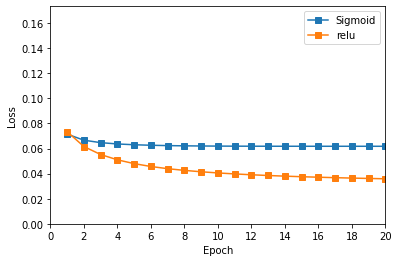

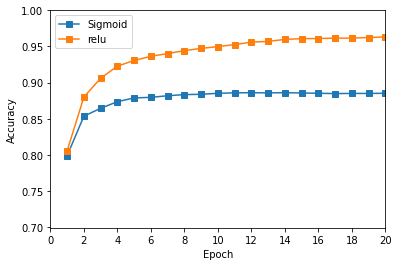

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

MemoryError: bad allocation

### Test

In [ ]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [ ]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [ ]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

In [ ]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

## Plot

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

## 3 2-layer MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [ ]:
from criterion import SoftmaxCrossEntropyLossLayer, EuclideanLossLayer
from layers import FCLayer, SigmoidLayer, ReLULayer
from optimizer import SGD

In [ ]:
batch_size = 100
max_epoch = 60
init_std = 0.01

learning_rate_SGD = 3e-3
weight_decay = 1e-3

disp_freq = 60

In [ ]:
criterion = EuclideanLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 32))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(32, 10))

sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

In [ ]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

In [ ]:
reluMLP = Network()
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 32))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(32, 10))

reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

In [ ]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})